In [22]:
#Esercizio1/3
from plotly import express as px

In [5]:
stocks = px.data.stocks()

In [3]:
stocks

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0    2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1    2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2    2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3    2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4    2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708
..          ...       ...       ...       ...       ...       ...       ...
100  2019-12-02  1.216280  1.546914  1.425061  1.075997  1.463641  1.720717
101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
102  2019-12-16  1.224418  1.596800  1.453455  1.104094  1.604362  1.784896
103  2019-12-23  1.226504  1.656000  1.521226  1.113728  1.567170  1.802472
104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185

[105 rows x 7 columns]

In [5]:
stocks.shape

(105, 7)

In [7]:
stocks["GOOG"]

0      1.000000
1      1.018172
2      1.032008
3      1.066783
4      1.008773
         ...   
100    1.216280
101    1.222821
102    1.224418
103    1.226504
104    1.213014
Name: GOOG, Length: 105, dtype: float64

In [2]:
from matplotlib import pyplot as plt

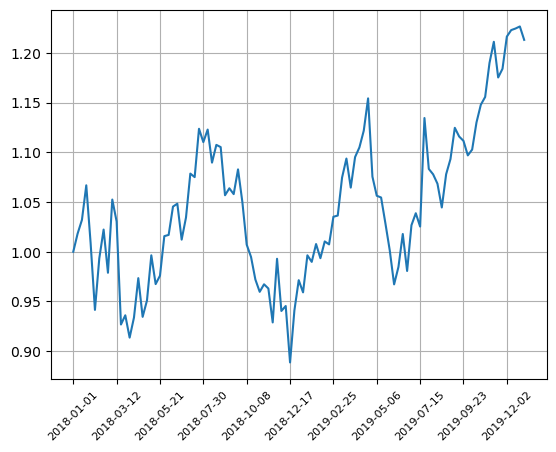

In [21]:
#Estraiamo i dati della colonna "GOOG" relative all'andamento delle azioni di Google, e visualizziamolo mediante pyplot
plt.plot(stocks.date, stocks.GOOG)
plt.xticks(stocks.date[::10], fontsize=8, rotation=45)
plt.grid(True)

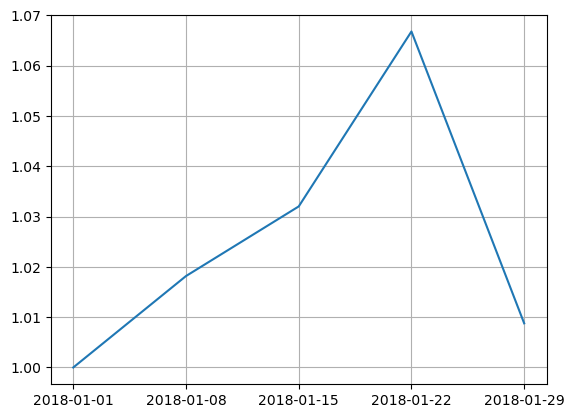

In [19]:
#Estraiamo le prime 5 righe della colonna "GOOG" e della colonna "date", e usiamoli come ascisse e ordinate su un grafico mediante pyplot
plt.plot(stocks.date[:5], stocks.GOOG[:5])
plt.grid(True)

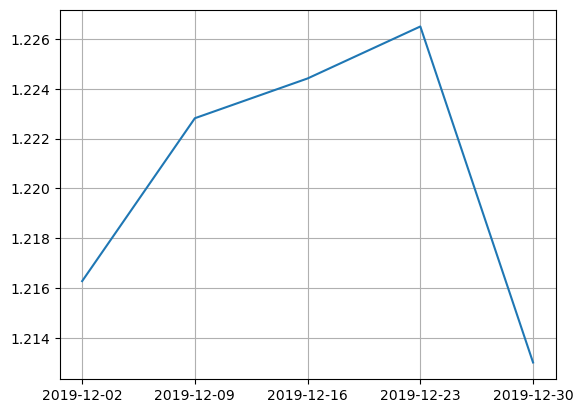

In [20]:
#Facciamo lo stesso per le ultime 5 righe del dataset
plt.plot(stocks.date[-5:], stocks.GOOG[-5:])
plt.grid(True)

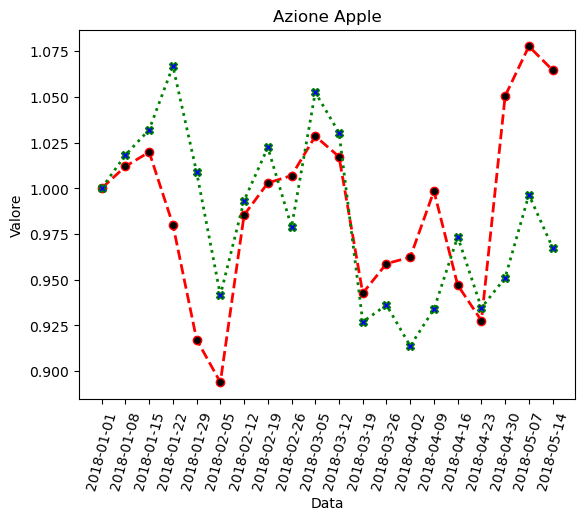

In [136]:
#Esercizio 2/3
#Estraiamo le prime 20 istanze della colonna "AAPL" delle azioni di Apple, e visualizziamo il grafico tramite pyplot, in modo che:
#il grafico sia rosso
#la linea sia tratteggiata
#vi sia un pallino come marker
#l'asse delle ascisse si chiami "Data"
#l'asse delle ordinate si chiami "Valore"
#il titolo del grafico si "Azioni Apple"
#il markerfacecolor sia nero
#la linea abbia spessore uguale a 2
x=stocks.date.iloc[:20]
y=stocks.AAPL.iloc[:20]
plt.plot(x,y,"r--o", linewidth=2, markerfacecolor="k")
plt.plot(x,stocks.GOOG.iloc[:20], "g:X", linewidth=2, markerfacecolor="b")
plt.xticks(rotation=75)
plt.xlabel("Data")
plt.ylabel("Valore")
plt.title("Azione Apple");

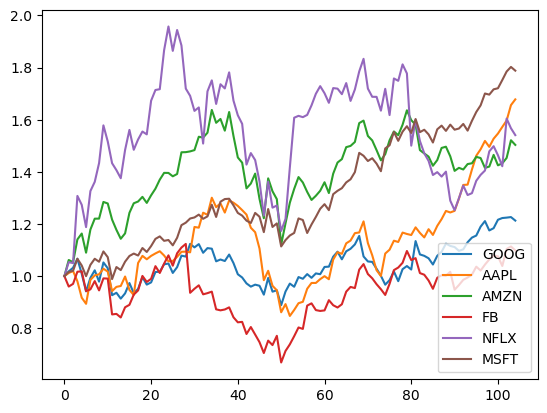

In [31]:
#Esercizio 3/3
#Utilizzando i metodi di rappresentazione grafica dei DataFrame, visualizziamo l'andamente di tutte le azioni sullo stesso grafico
#Tramite pyplot, spostiamo la legenda in basso a destra
stocks.plot()
plt.legend(loc="lower right")

In [110]:
#--------------------------------------------------Secondo Esercizio-----------------------------------------------
#Da plotly.express importiamo il dataset elections
from plotly import express as px
election= px.data.election()
election.head(5)

district  Coderre  Bergeron  Joly  total    winner     result  \
0     101-Bois-de-Liesse     2481      1829  3024   7334      Joly  plurality   
1  102-Cap-Saint-Jacques     2525      1163  2675   6363      Joly  plurality   
2   11-Sault-au-Récollet     3348      2770  2532   8650   Coderre  plurality   
3           111-Mile-End     1734      4782  2514   9030  Bergeron   majority   
4         112-DeLorimier     1770      5933  3044  10747  Bergeron   majority   

   district_id  
0          101  
1          102  
2           11  
3          111  
4          112

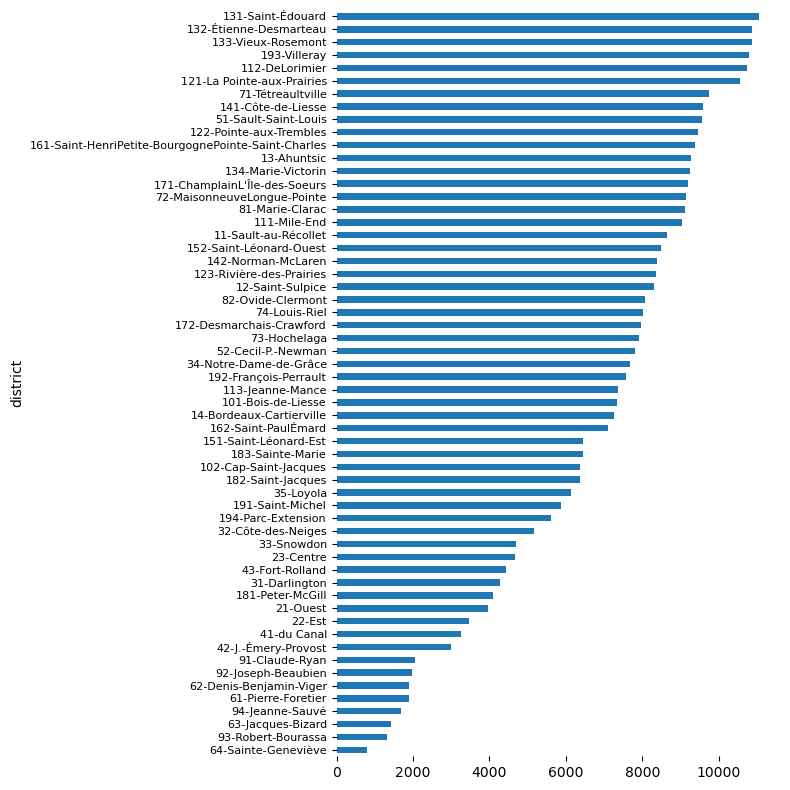

In [132]:
#Disegnamo un grafico a barre dove confrontiamo i voti totali presi dai tre candidati
election.set_index("district", inplace=True)
election.sort_values("total", inplace=True)
plt.figure(figsize=[8,8])
election.total.plot(kind="barh")
plt.yticks(fontsize=8)
plt.box(False)
plt.tight_layout()

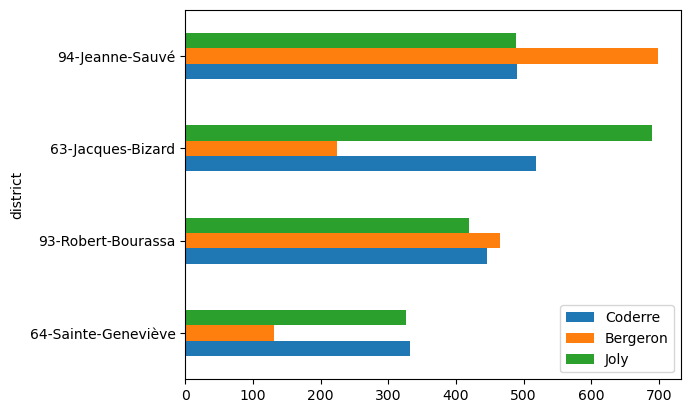

In [109]:
#Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti
election.iloc[:4,:3].plot(kind="barh")
plt.savefig("elezionibarre.png",dpi=500)

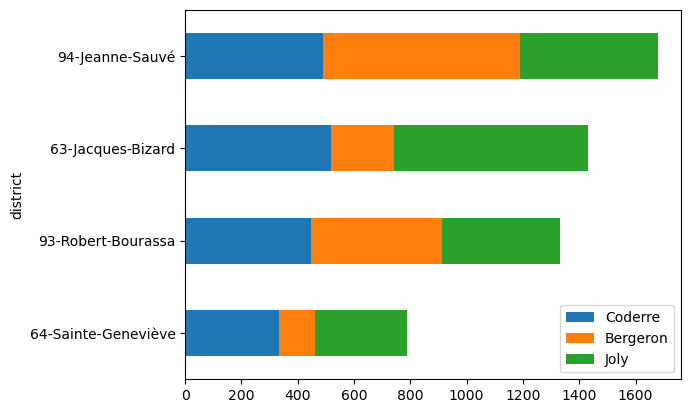

In [133]:
#Visualizzarlo sia in formato appaiato che impilato (stacked)
election.iloc[:4,:3].plot(kind="barh",stacked=True)
plt.savefig("elezionibarrestacked.png",dpi=500)
#Salvare entrambi i grafici su disco in alta risoluzione

In [113]:
#Esercizio 1/3
#Da seaborn importiamo il dataset titanic
import seaborn as sns
titanic=sns.load_dataset("titanic")
titanic.shape

(891, 15)

In [114]:
#Quanti ponti c'erano sulla nave
len(set(titanic.deck))

8

In [137]:
#Ci sono dati mancanti? Dove? Quanti? Come potremmo gestirli?
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

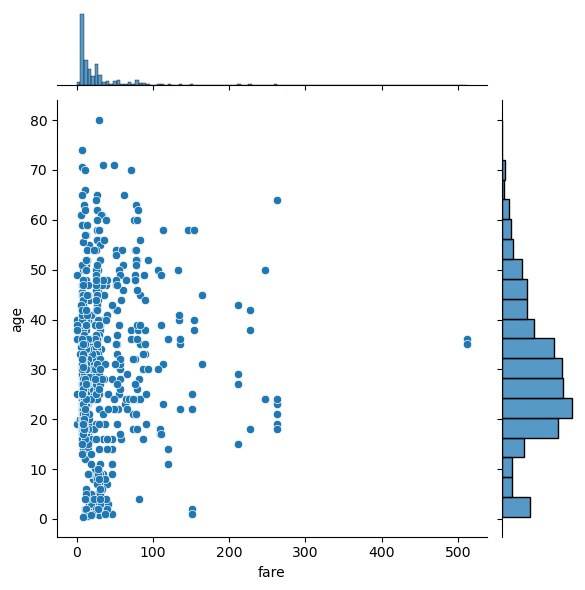

In [138]:
#Tramite seaborn visualizziamo un jointplot sulle colonne "fare e "age"; che cosa stiamo guardando?
sns.jointplot(data=titanic, x="fare", y="age");

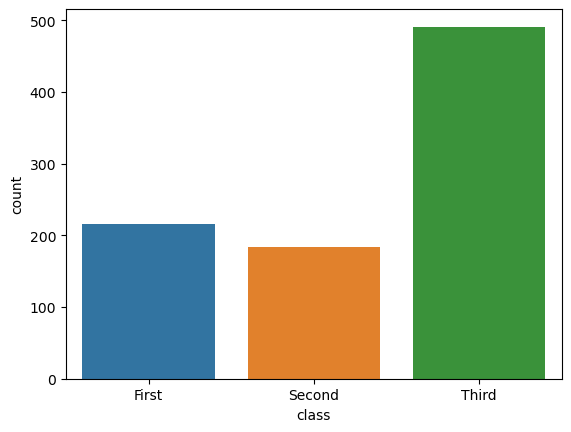

In [116]:
#Esercizio 2/3
#Visualizzare un grafico con la differenza tra il numero di passeggeri di ogni casse di imbarco
sns.countplot(data=titanic, x="class");

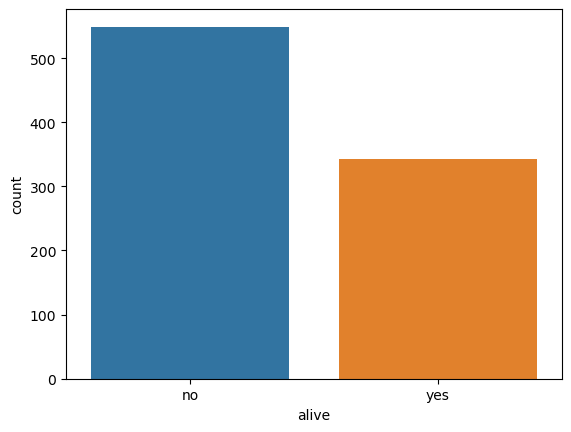

In [117]:
#Fare la stessa cosa per la colonna "alive"
sns.countplot(data=titanic, x="alive");

<Axes: xlabel='class', ylabel='age'>

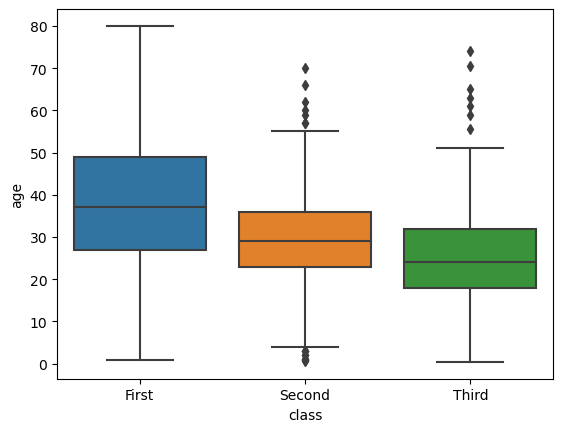

In [118]:
#Riusciamo a vedere la distribuzione delle età dei paseggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con uno swarmplot
sns.boxplot(data=titanic, x="class", y="age")

<Axes: xlabel='class', ylabel='age'>

C:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


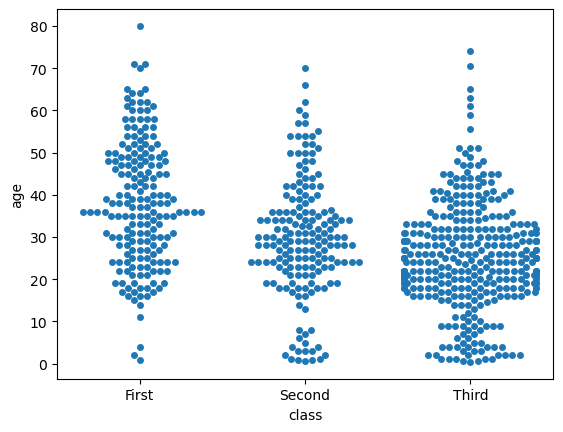

In [126]:
sns.swarmplot(data=titanic, x="class", y="age")

<Axes: xlabel='age', ylabel='Density'>

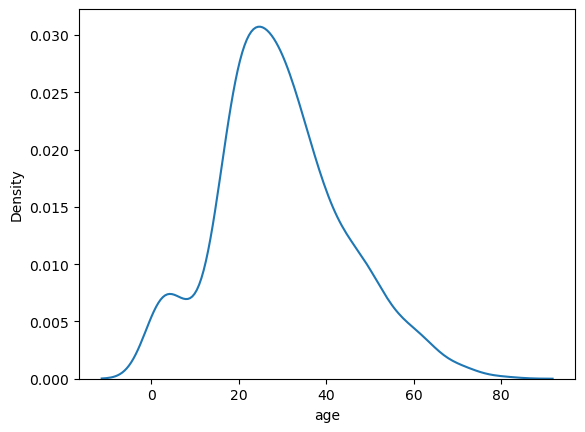

In [128]:
#Visualizziamo un kdeplot per la colonna "age"
sns.kdeplot(data=titanic ,x="age")

<Axes: xlabel='survived', ylabel='fare'>

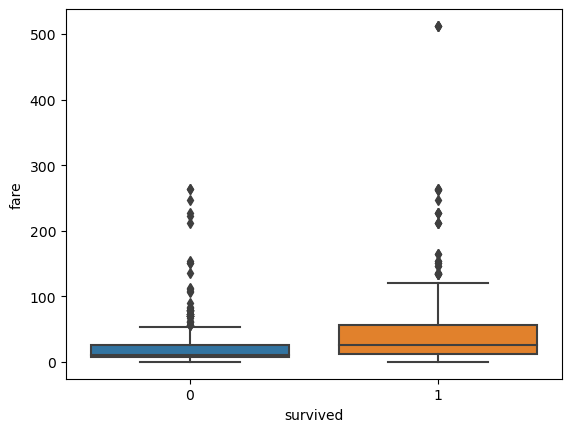

In [129]:
#Visualizziamo un boxplot e un Implot rispetto alle colonne "fare"" e "survived"; che cose ne deduciamo?
sns.boxplot(data=titanic , x="survived",y="fare")

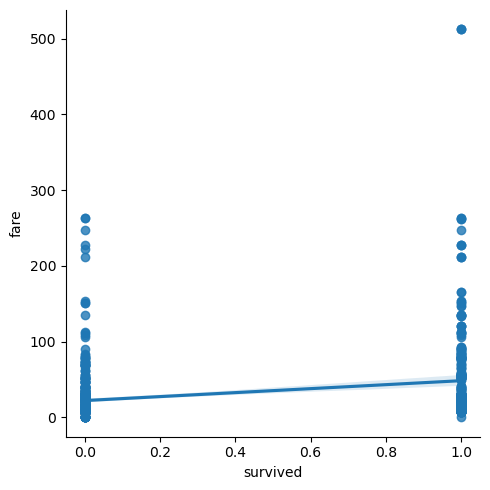

In [75]:
sns.lmplot(data=titanic , x="survived",y="fare")

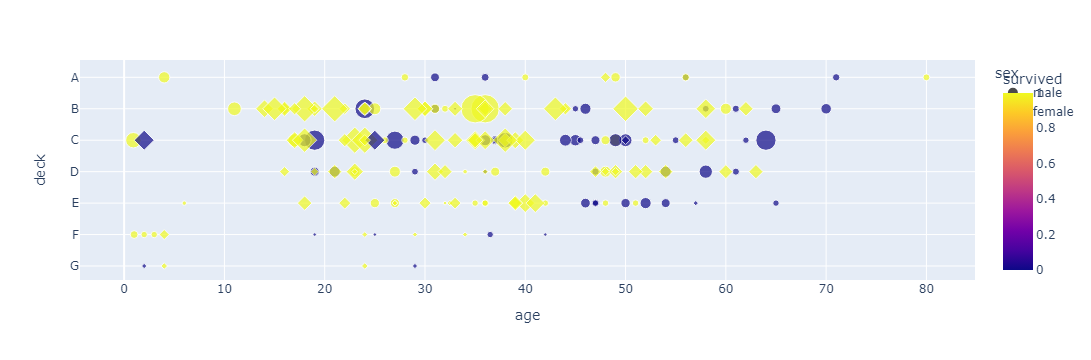

In [131]:
#Esercizio 3/3
#Realizziamo un grafico scatter interattivo tramite plotly.express dove avremo:
px.scatter(data_frame=titanic,
           x="age", y="deck", #l'età sull'asse x e il ponte sull'asse y
          color="survived",   #il colore rispetto a se la persona è sopravvissuta o meno
          size="fare",        #la dimensione del marker rispetto alla tariffa
          symbol="sex",       #il simbolo (tramite il parametro symbol=) rispetto alla colonna sex
          category_orders={"deck":list("ABCDEFG")})